In [1]:
import numpy as np 
import pandas as pd
import joblib
import seaborn
%matplotlib inline

In [2]:
data_train = pd.read_csv('./data/features.train.csv').set_index('id')
data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek,education,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,...,relationship_wife,relationship_other-relative,race_white,race_black,race_asian-pac-islander,race_other,race_amer-indian-eskimo,sex_male,sex_female,label
id,,,,,,,,,,,,,,,,,,,,,
26890,0.866005,2.144410,-0.327581,-0.231881,1.094355,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
933,0.866005,1.373691,3.937169,-0.231881,1.094355,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25596,0.067553,-0.167747,-0.327581,-0.231881,-0.051599,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12949,0.067553,0.988332,-0.327581,-0.231881,1.094355,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6681,-0.730900,-0.553107,-0.327581,-0.231881,-0.051599,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.529352,-0.167747,-0.327581,-0.231881,-0.051599,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2192,0.067553,-0.167747,1.804794,-0.231881,-0.051599,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8250,-1.529352,-0.553107,-0.327581,-0.231881,-0.051599,4.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
model = joblib.load('model/model.joblib')
model

RandomForestClassifier(criterion='entropy', random_state=0)

In [4]:
feature_importance = pd.DataFrame({
    'feature_name': model.feature_names_in_,
    'feature_importance': model.feature_importances_,
})

feature_importance.sort_values(
    by = 'feature_importance', 
    ascending = False,
    inplace = True
)
feature_importance

,feature_name,feature_importance
0,age-group,0.122991
2,capitalgain,0.084686
4,hoursperweek,0.084015
1,education-num,0.066936
8,occupation,0.057525
...,...,...
55,occupation_priv-house-serv,0.000229
35,education_preschool,0.000129
18,workclass_without-pay,0.000103
56,occupation_armed-forces,0.000033


<Axes: xlabel='feature_importance', ylabel='feature_name'>

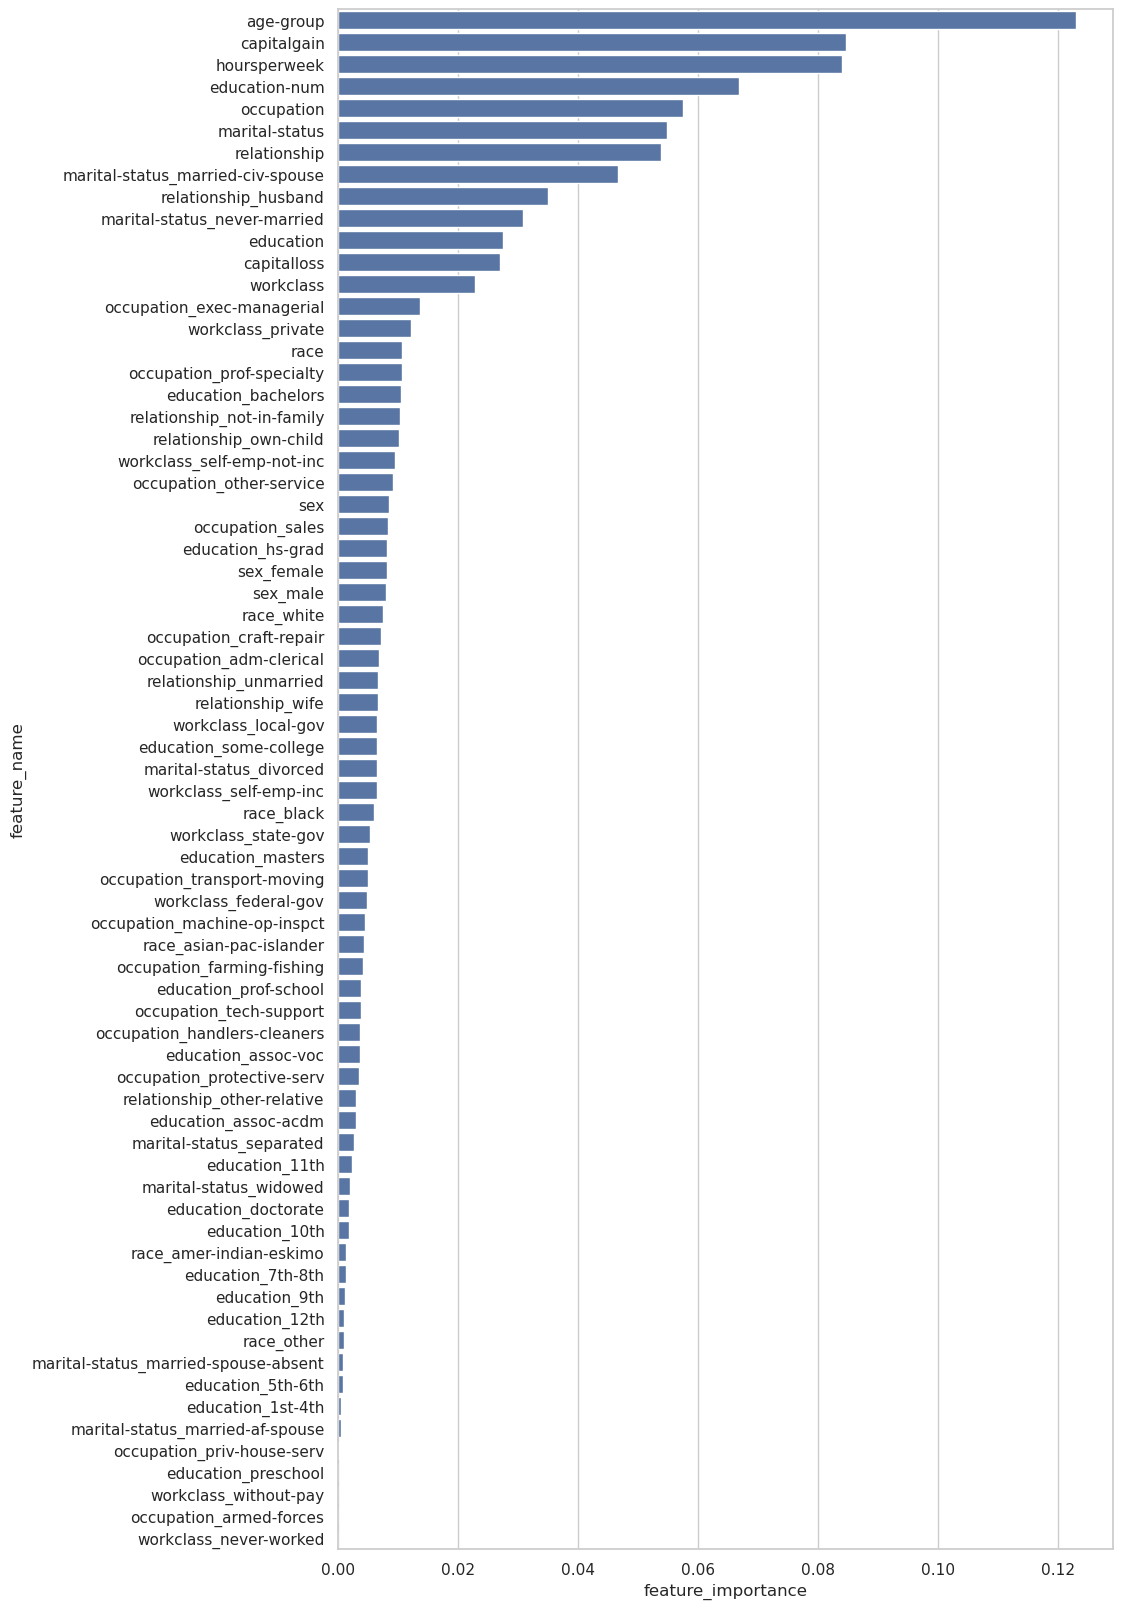

In [6]:
seaborn.set(
    style = 'whitegrid', 
    rc    = {'figure.figsize': (10, 20)}
)

seaborn.barplot(
    data=feature_importance,
    x='feature_importance', 
    y='feature_name'
)